# Cat and Dog Classification Project — Stepwise Explanation

Image classification using a Convolutional Neural Network (CNN) model to distinguish between cat and dog images.




In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 65% 141M/218M [00:00<00:00, 1.47GB/s]
100% 218M/218M [00:00<00:00, 1.06GB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Step 1: Importing Required Libraries

In this step, we import all the necessary Python libraries such as TensorFlow, Keras, NumPy, and Matplotlib. These libraries are used for deep learning model building, numerical computation, and visualization.


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Step 1: General Operations

This step performs auxiliary or intermediate tasks such as defining variables, handling file paths, or performing setup configurations needed for the main model pipeline.


In [ ]:
train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'


### Step 3: Loading and Preprocessing Image Dataset

Here, the code loads the cat and dog image dataset from directories using Keras utilities. It applies preprocessing steps such as rescaling, resizing, and batch generation to prepare the data for model training.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Step 4: Building the CNN Model

This step constructs the Convolutional Neural Network (CNN) architecture using the Sequential API. It defines convolutional, pooling, and fully connected layers that help the model learn spatial and abstract features from the input images.


In [ ]:
# CNN MODEl
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,782,913 (10.62 MB)

 Trainable params: 2,781,953 (10.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# compile the model
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.00005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_set, epochs=25, validation_data=test_set)

Epoch 1/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 71s 245ms/step - accuracy: 0.5513 - loss: 0.8804 - val_accuracy: 0.4998 - val_loss: 1.0273
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 216ms/step - accuracy: 0.6138 - loss: 0.6872 - val_accuracy: 0.6416 - val_loss: 0.6457
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.6376 - loss: 0.6465 - val_accuracy: 0.6708 - val_loss: 0.6017
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.6489 - loss: 0.6277 - val_accuracy: 0.7088 - val_loss: 0.5651
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.6595 - loss: 0.6172 - val_accuracy: 0.7237 - val_loss: 0.5514
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 214ms/step - accuracy: 0.6851 - loss: 0.5943 - val_accuracy: 0.7346 - val_loss: 0.5352
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 214ms/step - accuracy: 0.6838 - loss: 0.5930 - val_accuracy: 0.7370 - val_loss: 0.5267
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 216ms/step - accuracy: 0.7102 - loss: 0

### Step 5: Model evaluation



64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8036 - loss: 0.4141
Test accuracy: 0.8042511343955994
Test loss: 0.41619813442230225


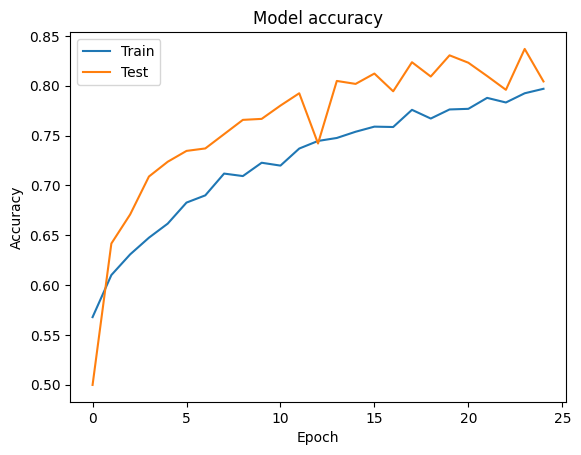

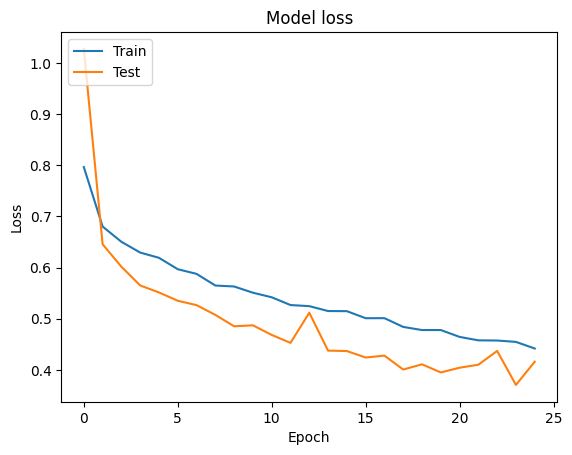

In [ ]:
# Evaluate the model on the test set
loss, acc = model.evaluate(test_set)
print(f"Test accuracy: {acc}")
print(f"Test loss: {loss}")


import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Step 6: Prediction Function



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_unseen_image(model, img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    plt.imshow(image.load_img(img_path))
    plt.axis('off')

    # result
    if prediction > 0.5:
        plt.title(f"Prediction: Dog 🐶 (Confidence: {prediction:.2f})", fontsize=14)
    else:
        plt.title(f"Prediction: Cat 🐱 (Confidence: {1 - prediction:.2f})", fontsize=14)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


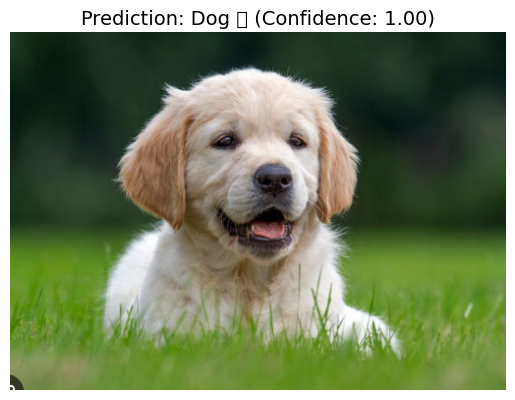

In [ ]:
predict_unseen_image(model, '/Screenshot 2025-11-05 183607.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


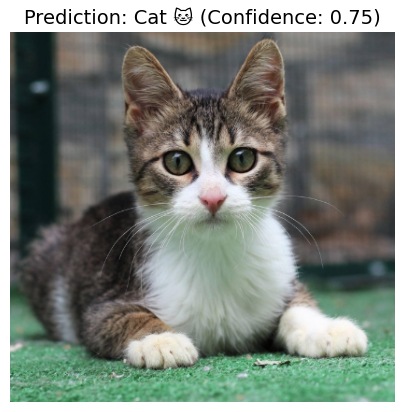

In [ ]:
predict_unseen_image(model, '/Screenshot 2025-11-05 183929.png')

### Step 7: Model Save



In [ ]:

model.save('cat_dog_classifier.h5')

from google.colab import files
files.download('cat_dog_classifier.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>